# Basic in OpenCV

## Import package

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import imutils

## Read image

In [20]:
image = cv.imread("lena.png")
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# b = image[:,:,0]
# g = image[:,:,1]
# r = image[:,:,2]
# image[:,:,0] = b
# image[:,:,1] = r
# image[:,:,2] = g




In [21]:
while True:
    cv.imshow("Mon image",image)
    k = cv.waitKey(0)
    print(k)
    if k == 27:
        cv.destroyAllWindows()
        break

27


## Plot image with matplotlib

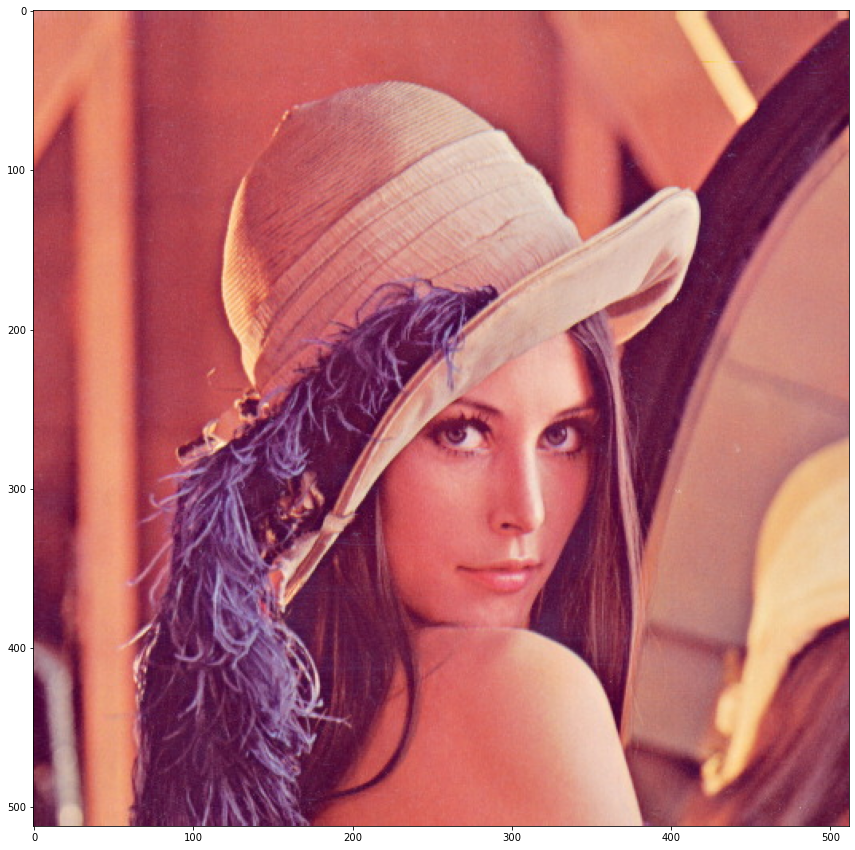

In [4]:
plt.figure(figsize=(28,15))
plt.imshow(image)

## Extract part of an image

In [5]:
(w,h,d) = image.shape

In [6]:
print(f"Largeur {w} , Hauteur {h} , Profondeur {d}")

Largeur 512 , Hauteur 512 , Profondeur 3


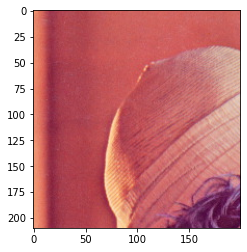

In [7]:
roi = image[10:220,50:250]
roi.shape
plt.imshow(roi)

## Resize image

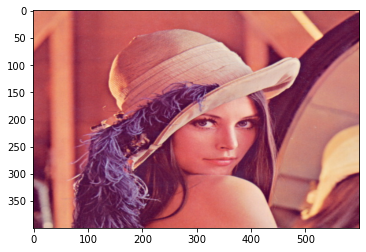

In [8]:
resized = cv.resize(image,(600,400))
plt.imshow(resized)

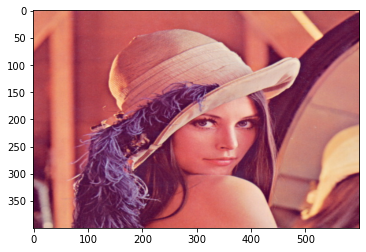

In [9]:
new_width = 600
ratio = new_width/image.shape[0]
new_height = int(ratio*image.shape[1])
resised = cv.resize(image,(new_width,new_height))
plt.imshow(resized)

## Rotate image

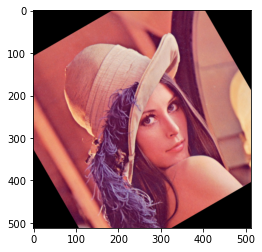

In [10]:
w = image.shape[0]
h = image.shape[1]
center = (w//2,h//2)
M = cv.getRotationMatrix2D(center,30,1.0)
rotated = cv.warpAffine(image,M,(w,h))
plt.imshow(rotated)

## Blur Image

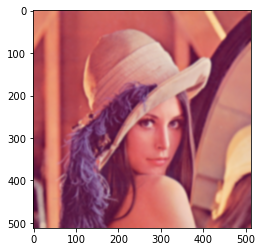

In [11]:
blured = cv.GaussianBlur(image,(11,11),0)
plt.imshow(blured)

## Draw on image

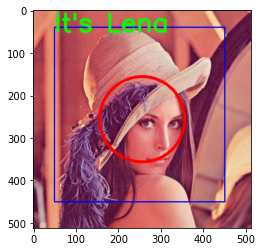

In [12]:
drawed = image.copy()
# Rectangle
cv.rectangle(drawed,(50,40),(450,450),(0,0,255),2)
# Cercle
center = (drawed.shape[0]//2,drawed.shape[1]//2)
cv.circle(drawed,center,100,(255,0,0),5)
# Text
cv.putText(drawed, "It's Lena", (50,50), cv.FONT_HERSHEY_SIMPLEX, 2,(0, 255, 0), 5)
plt.imshow(drawed)

## Convert image to grayscale

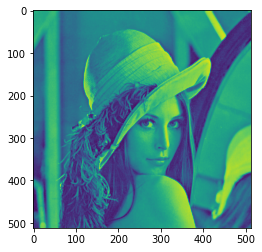

In [13]:
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.imshow(gray)

## Edge detection

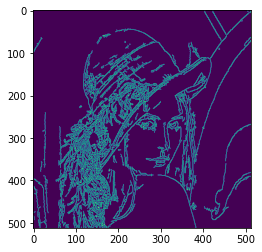

In [14]:
edged = cv.Canny(gray,60, 150)
plt.imshow(edged)

## Thresholding

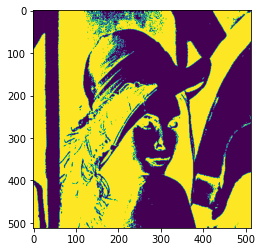

In [15]:
thresh = cv.threshold(gray,130,255,cv.THRESH_BINARY_INV)[1]
plt.imshow(thresh)

## Find countours

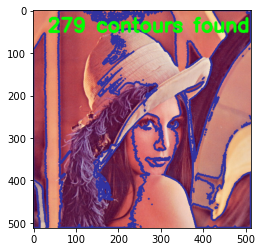

In [16]:
cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
for c in cnts:
    cv.drawContours(output, [c], -1 , (50, 50, 159),3)
cv.putText(output, f" {len(cnts)} contours found ",(10,50), cv.FONT_HERSHEY_SIMPLEX, 1.5,(0, 255, 0), 5)
plt.imshow(output)